# Fitting Docker vs Faasd  Distribution

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from fitter import Fitter, get_common_distributions, get_distributions

pd.options.display.max_rows = 50
sns.set_theme(style="darkgrid")

In [2]:
dataset = pd.read_csv("../results/resp_time_distribution.csv")

In [3]:
dataset.head()

,docker-distance,faasd-distance,docker-blockchain,faasd-blockchain
0,0.006910,0.321220,0.864425,2.009566
1,0.013986,0.183193,0.869114,1.990304
2,0.006473,0.192597,0.876750,1.980668
3,0.006076,0.216715,0.890567,1.980647
4,0.022268,0.242508,0.877038,1.961713


## Blockchain Response Time

### Docker

<AxesSubplot:xlabel='docker-blockchain', ylabel='Count'>

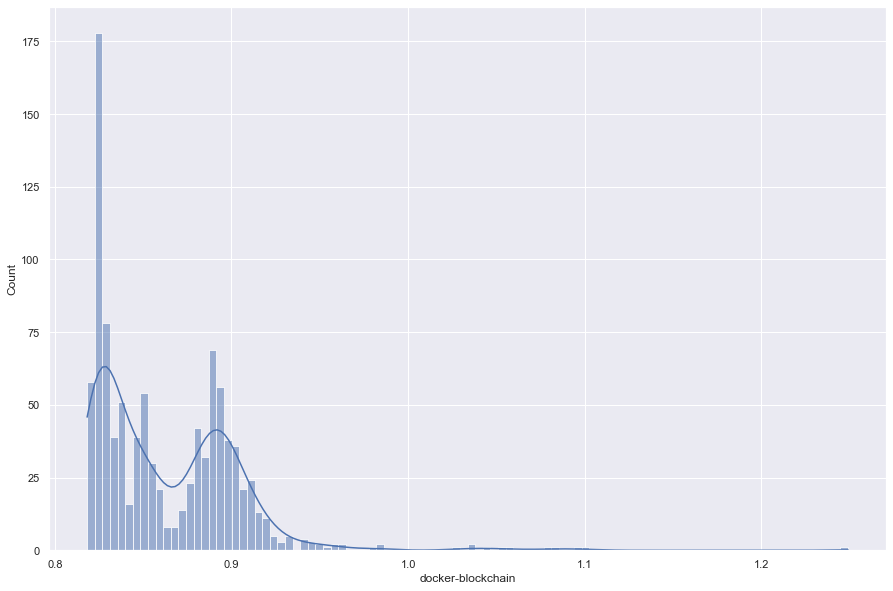

In [4]:
fig = plt.figure(figsize=(15, 10))

sns.histplot(data=dataset, x="docker-blockchain", bins=100, kde=True)

In [5]:
docker = dataset["docker-blockchain"].values

,sumsquare_error,aic,bic,kl_div
lognorm,1086.391969,172.820557,103.585351,inf
expon,1112.746468,345.950274,120.646766,inf
exponpow,1264.339334,406.014239,255.272986,inf
rayleigh,1708.417418,1575.805192,549.382966,inf
norm,1797.386101,2158.546230,600.148954,inf


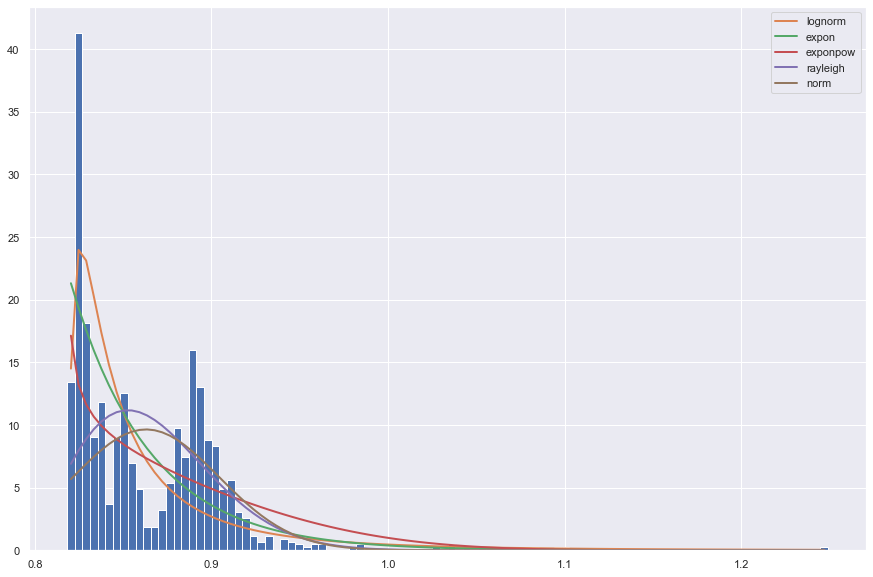

In [6]:
# f = Fitter(docker, timeout=100)
fig = plt.figure(figsize=(15, 10))

f = Fitter(docker, distributions=get_common_distributions())
f.fit()
f.summary(method='sumsquare_error')

In [7]:
f.get_best()

{'lognorm': {'s': 1.1076244750592275,
  'loc': 0.8178075536764503,
  'scale': 0.027484631343196453}}

### Faasd

<AxesSubplot:xlabel='faasd-blockchain', ylabel='Count'>

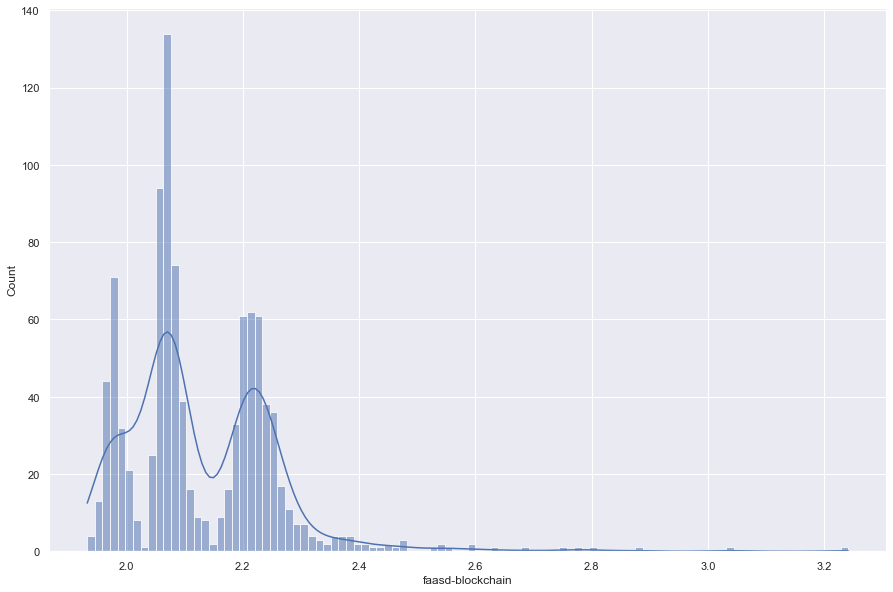

In [8]:
fig = plt.figure(figsize=(15, 10))

sns.histplot(data=dataset, x="faasd-blockchain", bins=100, kde=True)

In [9]:
faasd = dataset["faasd-blockchain"].values

,sumsquare_error,aic,bic,kl_div
rayleigh,155.765802,1304.015531,-1845.586159,inf
lognorm,157.207713,555.103508,-1829.464069,inf
norm,162.733083,1848.821709,-1801.828440,inf
cauchy,167.289326,391.918761,-1774.214963,inf
exponpow,171.825520,1188.163258,-1740.552470,inf


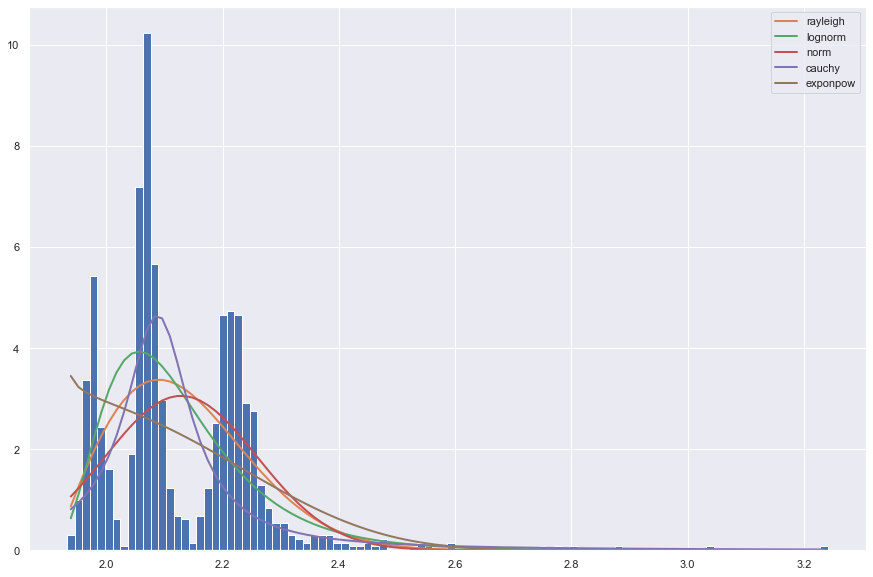

In [10]:
fig = plt.figure(figsize=(15, 10))

f = Fitter(faasd, distributions=get_common_distributions())
f.fit()
f.summary()

In [11]:
f.get_best()

{'rayleigh': {'loc': 1.9104911172189012, 'scale': 0.1797653996701631}}

## String Distance Response Time

### Docker

<AxesSubplot:xlabel='docker-distance', ylabel='Count'>

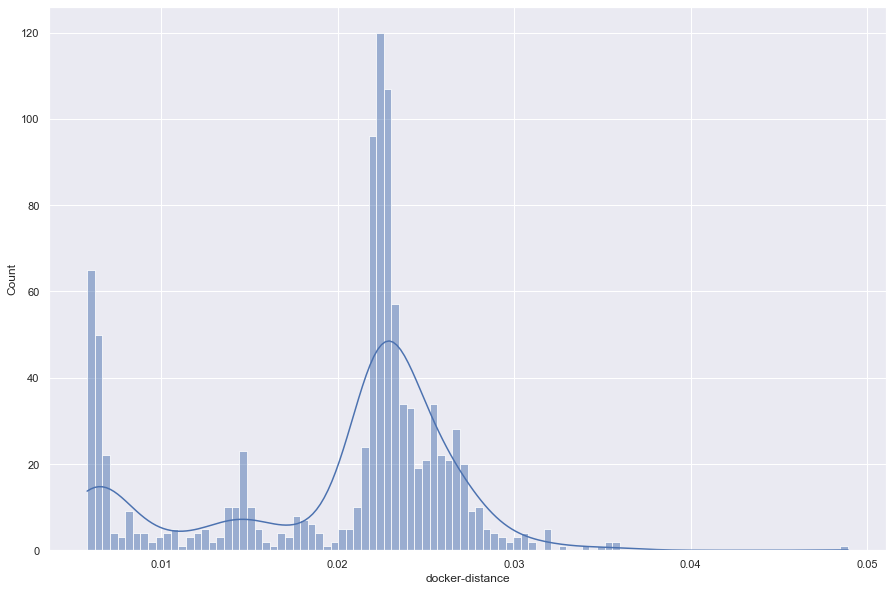

In [12]:
fig = plt.figure(figsize=(15, 10))

sns.histplot(data=dataset, x="docker-distance", bins=100, kde=True)

In [13]:
docker = dataset["docker-distance"].values

,sumsquare_error,aic,bic,kl_div
cauchy,97399.346127,-384.959034,4592.635008,inf
exponpow,193325.783056,112.611698,5285.100027,inf
lognorm,196230.177446,-383.453870,5300.011611,inf
norm,196292.616932,-377.802417,5293.422000,inf
gamma,200823.083374,-421.593328,5323.147604,inf


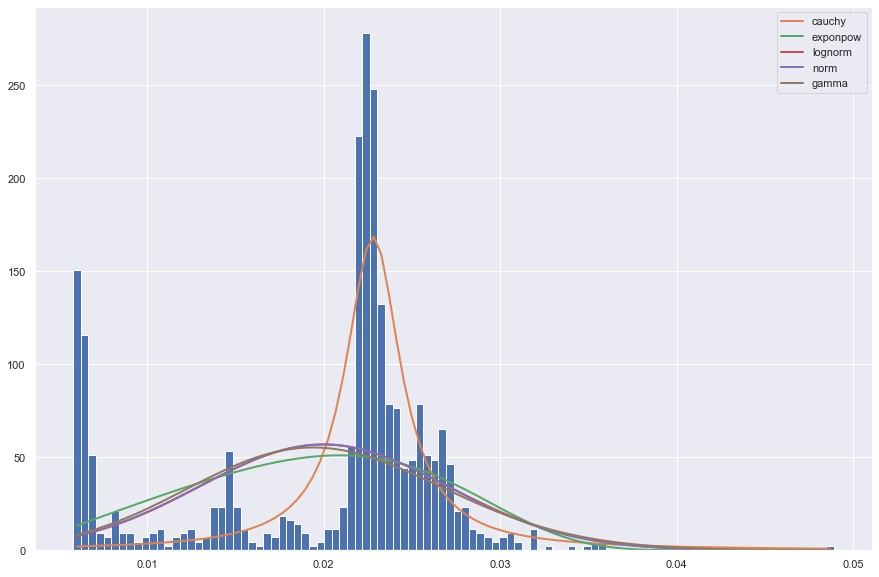

In [14]:
fig = plt.figure(figsize=(15, 10))

# f = Fitter(docker, timeout=100)
f = Fitter(docker, distributions=get_common_distributions())
f.fit()
f.summary()

In [15]:
f.get_best()

{'cauchy': {'loc': 0.022805109566822176, 'scale': 0.0018872360976320396}}

### Faasd

<AxesSubplot:xlabel='faasd-distance', ylabel='Count'>

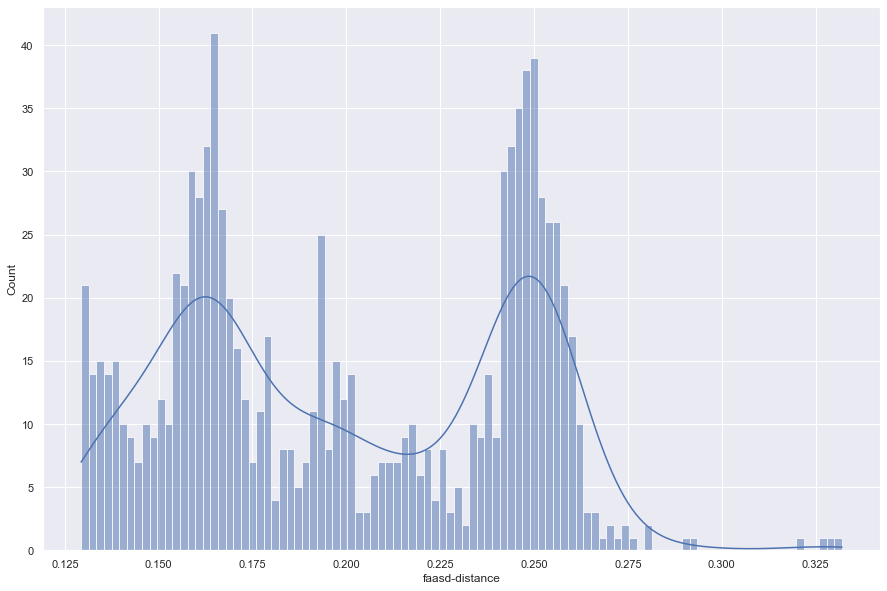

In [16]:
fig = plt.figure(figsize=(15, 10))

sns.histplot(data=dataset, x="faasd-distance", bins=100, kde=True)

In [17]:
faasd = dataset["faasd-distance"].values

,sumsquare_error,aic,bic,kl_div
rayleigh,2276.893182,-237.897578,836.627385,inf
lognorm,2383.026406,-231.680393,889.094545,inf
gamma,2417.679965,-218.099433,903.531654,inf
norm,2431.521392,-212.291293,902.332659,inf
expon,2463.580515,-239.723618,915.431296,inf


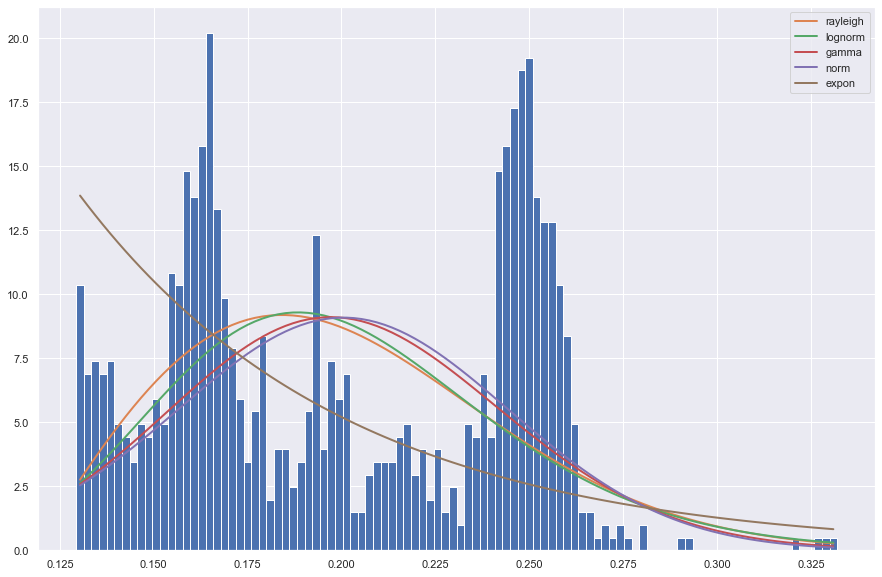

In [18]:
fig = plt.figure(figsize=(15, 10))

f = Fitter(faasd, distributions=get_common_distributions())
f.fit()
f.summary()

In [19]:
f.get_best()

{'rayleigh': {'loc': 0.11816185533329944, 'scale': 0.0659609105394196}}

<AxesSubplot:xlabel='faasd-distance', ylabel='Count'>

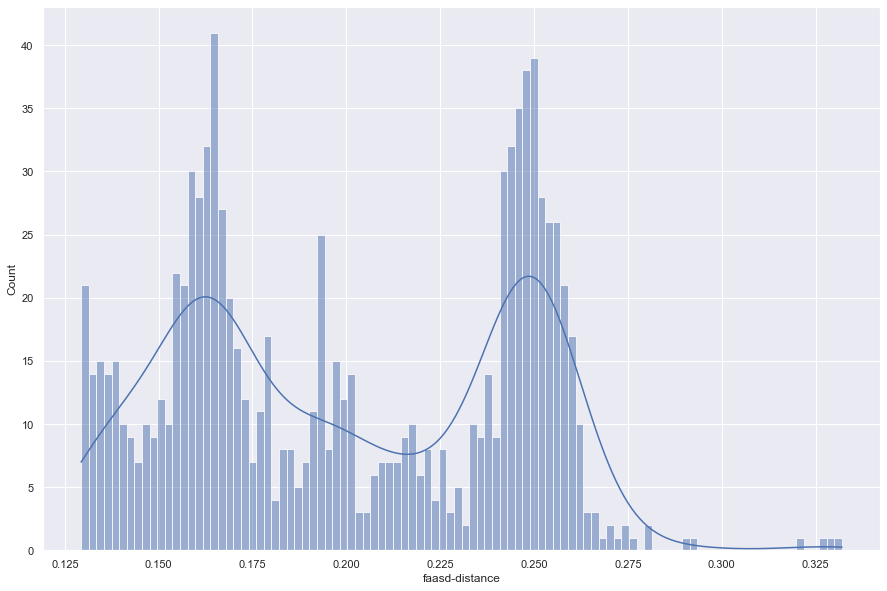

In [20]:
fig = plt.figure(figsize=(15, 10))

sns.histplot(data=dataset, x="faasd-distance", bins=100, kde=True)

In [21]:
faasd = dataset["faasd-distance"].values

,sumsquare_error,aic,bic,kl_div
rayleigh,2276.893182,-237.897578,836.627385,inf
lognorm,2383.026406,-231.680393,889.094545,inf
gamma,2417.679965,-218.099433,903.531654,inf
norm,2431.521392,-212.291293,902.332659,inf
expon,2463.580515,-239.723618,915.431296,inf


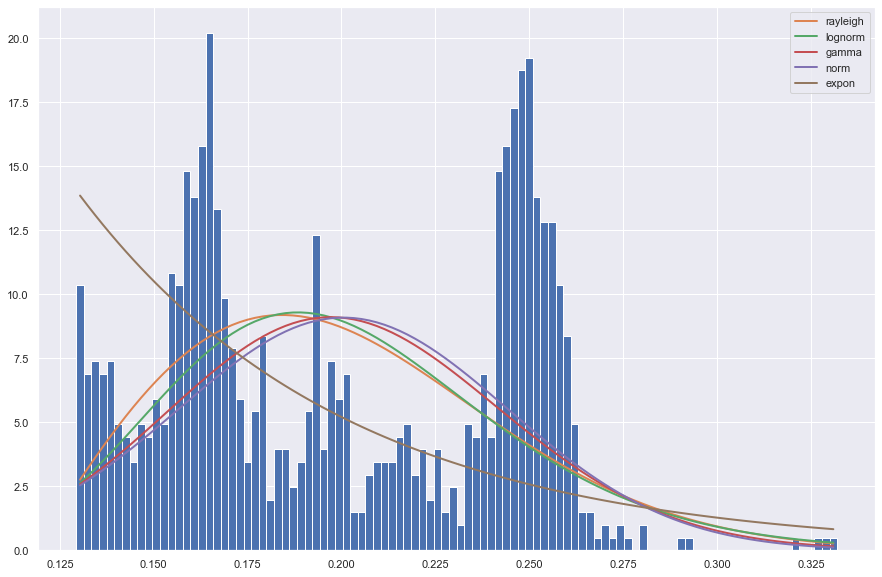

In [22]:
fig = plt.figure(figsize=(15, 10))

f = Fitter(faasd, distributions=get_common_distributions())
f.fit()
f.summary()

In [23]:
f.get_best()

{'rayleigh': {'loc': 0.11816185533329944, 'scale': 0.0659609105394196}}